<a href="https://colab.research.google.com/github/Shivam26102022/Repo_00/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

In [ ]:
mapping= {0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9'}
test_data = pd.read_csv("/content/sample_data/mnist_test.csv", header = None)
train_data = pd.read_csv("/content/sample_data/mnist_train_small.csv", header = None)
train_data.head()
test_data.head()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,20000.0,4.4702,2.892755,0.0,2.0,4.0,7.0,9.0
1,20000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
2,20000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
3,20000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
4,20000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
780,20000.0,0.0060,0.600318,0.0,0.0,0.0,0.0,62.0
781,20000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
782,20000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
783,20000.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0


1. Data Preprocessing

-Describe the dataset

-Separate out the label column

-Translate from ascii code to character

-Visualize some instances

-Normalize the data

-Flip and rotate the data

-Preprocessing¶

In [ ]:
train_data.shape

(20000, 785)

In [ ]:
test_data.shape

(10000, 785)

For the training phase, we have 20000 samples (images), each is represented by 784 feature (28x28 pixels)

In [ ]:
# Rename label column
train_data.rename(columns= {0: 'label'}, inplace = True)
test_data.rename(columns= {0: 'label'}, inplace = True)
train_data.columns

Index(['label',       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           775,     776,     777,     778,     779,     780,     781,     782,
           783,     784],
      dtype='object', length=785)

In [ ]:
train_data['label'].unique()


array([6, 5, 7, 9, 2, 0, 8, 3, 4, 1])

In [ ]:
acceptable_range = np.arange(0, 10)
train_data = train_data[train_data["label"].isin(acceptable_range)]
test_data = test_data[test_data["label"].isin(acceptable_range)]
np.sort(train_data.label.unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Resetting data
train_data.reset_index(inplace = True)
train_data

,index,label,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,19996,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,19997,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,19998,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data.reset_index(inplace = True)
test_data

,index,label,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data = train_data.drop(['index'], axis = 1)
test_data = test_data.drop(['index'], axis = 1)

In [ ]:
train_data.columns

Index(['label',       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           775,     776,     777,     778,     779,     780,     781,     782,
           783,     784],
      dtype='object', length=785)

In [ ]:
# Separate X and Y
X = train_data.drop(['label'], axis = 1).values
Y = train_data['label'].values

In [ ]:
# Splitting data first to prevent data leakage
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
print(x_train.shape)
print(x_val.shape)

(16000, 784)
(4000, 784)


In [ ]:
x_test = test_data.drop(['label'], axis = 1).values
y_test = test_data['label'].values

In [ ]:
print(x_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


Visualization

In [ ]:
#Standardize the data

def standardize(data):
    data = data.astype('float32') / 255
    return data

x_train = standardize(x_train)
x_val = standardize(x_val)

In [ ]:
print(x_train.shape)
print(x_val.shape)

(16000, 784)
(4000, 784)


Label 1500: 1


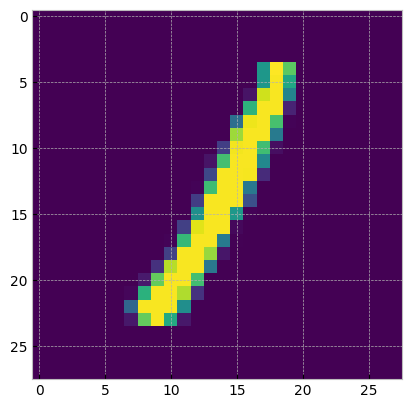

In [ ]:
# Visulize a sample image
W, H = 28, 28 # width and height of the image
sample = X[1500, :]
sample = sample.reshape(W, H)
print(f"Label 1500: {mapping[Y[1500]]}")
plt.imshow(sample)
plt.show()

Visulize more images

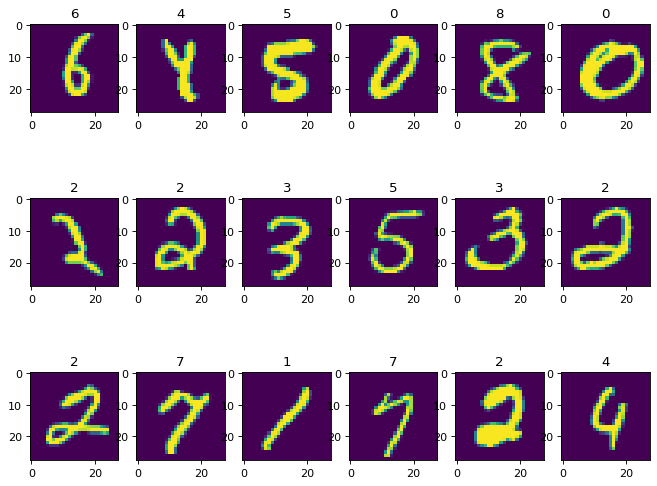

In [ ]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(100, 118):
    plt.subplot(3,6,i-99)
    plt.imshow(x_train[i, :].reshape(28, 28))
    plt.title(mapping[y_train[i]])

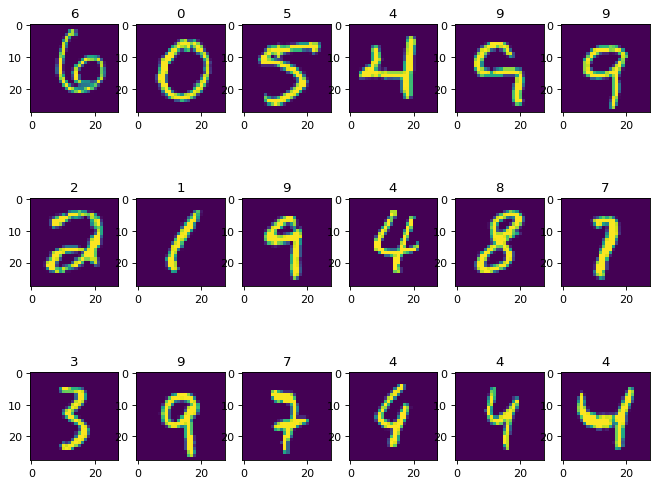

In [ ]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(100, 118):
    plt.subplot(3,6,i-99)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title(mapping[y_test[i]])

2. Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(x_train)
print("Training Accuracy: " + str(accuracy_score(y_train, y_pred)))

Training Accuracy: 1.0


In [ ]:
y_pred = rf.predict(x_val)
print("Validation Accuracy: " + str(accuracy_score(y_val,y_pred)))

Validation Accuracy: 0.953


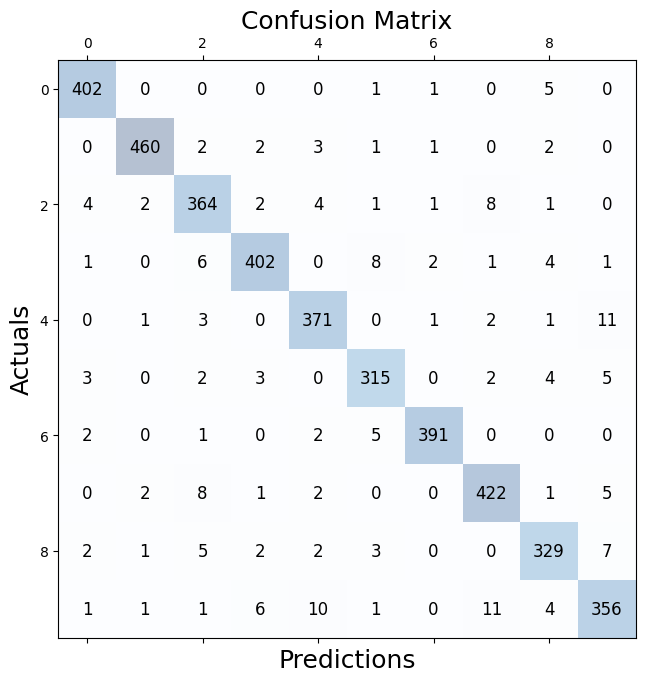

In [ ]:
matrix = confusion_matrix(y_val,y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='larger')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print("Validation Confusion Matrix \n" + str(matrix))

Validation Confusion Matrix 
[[402   0   0   0   0   1   1   0   5   0]
 [  0 460   2   2   3   1   1   0   2   0]
 [  4   2 364   2   4   1   1   8   1   0]
 [  1   0   6 402   0   8   2   1   4   1]
 [  0   1   3   0 371   0   1   2   1  11]
 [  3   0   2   3   0 315   0   2   4   5]
 [  2   0   1   0   2   5 391   0   0   0]
 [  0   2   8   1   2   0   0 422   1   5]
 [  2   1   5   2   2   3   0   0 329   7]
 [  1   1   1   6  10   1   0  11   4 356]]


The training accuracy is 100% while the validation accuracy is only about 95%. This performance somehow can be considered as great but I wonder about its generalization ability.

3. Prediction on Test set

In [ ]:
y_pred = rf.predict(x_test)
print("Test Accuracy: " + str(accuracy_score(y_test, y_pred)))


Test Accuracy: 0.9516


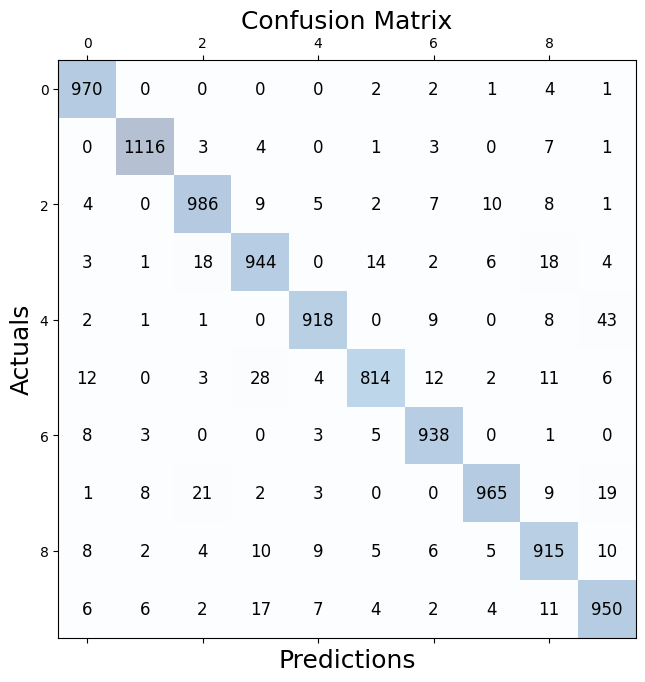

In [ ]:
matrix = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='larger')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

4. Experiment on Hyperparameter Effect

-I want to do some experiments about the effect of hyperparameter tuning on the accuracy performance. 

-I will try to capture the relationship between hyperparameters and the performance (measured by accuracy).

-Training size


In [ ]:
plt.style.use('bmh')

In [ ]:
# Stratified Sampling
def stratified_sampling(data, size_per_class):
    labels = data['label'].unique()
    sample_values = np.empty(shape = (size_per_class*(labels.size), data.shape[1]))
    for i in range(len(labels)):
        l = labels[i]
        class_df = data[data['label'] == l]
        sample = class_df.sample(n = size_per_class, random_state = 123).values
        sample_values[i*size_per_class: (i+1)*size_per_class, :] = sample
    df = pd.DataFrame(sample_values, columns = data.columns)
    return df

In [ ]:
samples = stratified_sampling(train_data, 100)
samples.label.value_counts()

6.0    100
5.0    100
7.0    100
9.0    100
2.0    100
0.0    100
8.0    100
3.0    100
4.0    100
1.0    100
Name: label, dtype: int64

In [ ]:
# Number of trees in random forest
n_estimators = np.arange(10, 1200, 100)

In [ ]:
def evaluate(model, x_val, y_val):
    y_pred = model.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy: {accuracy}")
    
    return accuracy

Training size

In [ ]:
X = train_data.drop(['label'], axis = 1)
Y = train_data['label']

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state = 42)

per_class_range = np.arange(200, 1000, 100)
train_acc = []
val_acc = []

for pc in per_class_range:
    sample_train = x_train.copy()
    sample_train['label'] = y_train.values
    sample_train = stratified_sampling(sample_train, pc)
    X = sample_train.drop(['label'], axis = 1).values
    Y = sample_train['label'].values

    rf = RandomForestClassifier()
    rf.fit(X, Y)
    print(f"Traning size: {pc}")
    print("Train", end = " ")
    train_acc.append(evaluate(rf, x_train, y_train))
    print("Validation", end = " ")
    val_acc.append(evaluate(rf, x_val, y_val))

Traning size: 200
Train Accuracy: 0.929
Validation Accuracy: 0.91925
Traning size: 300
Train Accuracy: 0.9421875
Validation Accuracy: 0.929
Traning size: 400
Train Accuracy: 0.9503125
Validation Accuracy: 0.92975
Traning size: 500
Train Accuracy: 0.9571875
Validation Accuracy: 0.93275
Traning size: 600
Train Accuracy: 0.9658125
Validation Accuracy: 0.941
Traning size: 700
Train Accuracy: 0.9675
Validation Accuracy: 0.94075
Traning size: 800
Train Accuracy: 0.9719375
Validation Accuracy: 0.9405
Traning size: 900
Train Accuracy: 0.9758125
Validation Accuracy: 0.9455


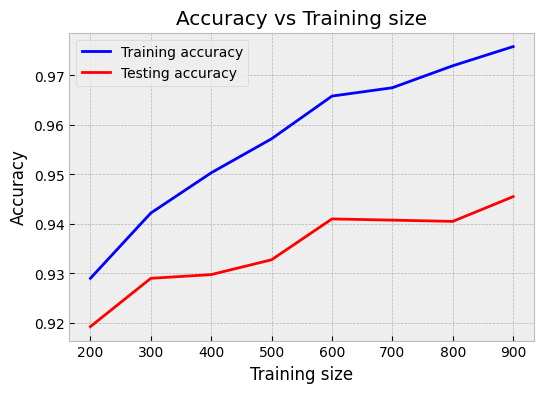

In [ ]:
plt.figure(figsize = (6, 4))
plt.plot(per_class_range, train_acc, 'b')
plt.plot(per_class_range, val_acc, 'r')
plt.xlabel("Training size")
plt.ylabel("Accuracy")
plt.legend(["Training accuracy", "Testing accuracy"])
plt.title("Accuracy vs Training size")
plt.show()

As our conventional expectation, the larger the training size, the higher accuracy on both training set and validation set. I implement stratified sampling on the original training data with the increasing sample size from 200 to 1000 in order to avoid imbalanced sample data. In here, I have to separate the train set and validation set before sampling to avoid "data leakage"

The "data leakage" means some of instances in validation set are "blended" in the training set, which leads to unexpected high accuracy on both training and validation set


Conclusions
```

```




After some experiments and predictions I have implement before, there are some key points you might want to pay attention to:

Dataset: The dataset is balanced and the indexed label can be mapped to ascii code, which need converting to human-readable form. Image converted from vectorized matrix is flipped and rotated 90 degree simultaneously

RandomForestClassifier: The model can capture some insights from the given training dataset and perform well 95.3% accuracy on validation set and 95.1% on testing set with its default setting. This result actually reasonable because conventionally, the general machine learning model are not considered to be good at image-processing problems.

In the last section, I conduct some test about relationships between number of estimators (predictors) and tree depth versus the accuracy. As I expected, model performs better with higher number of estimators.To summarize, it can be thought that the higher model complexity is, the better it performs.